In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import transformers


In [13]:
generation_categories_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")
generation_categories_sft2_20 = np.load("ckpts/sft2_ctrex_llama7B_commit20_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")
generation_categories_sft2_25 = np.load("ckpts/sft2_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")
generation_categories_sft2_35 = np.load("ckpts/sft2_ctrex_llama7B_commit35_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")

generation_categories_sft4_20 = np.load("ckpts/sft4_ctrex_llama7B_commit20_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")
generation_categories_sft4_25 = np.load("ckpts/sft4_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")
generation_categories_sft4_35 = np.load("ckpts/sft4_ctrex_llama7B_commit35_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_oodsmall_sample.npy")


In [14]:
sft_accuracy = generation_categories_sft[:, 1].mean()
sft_accuracy

0.1934

In [15]:
sft_idk_frac = generation_categories_sft[:, 3].mean()
sft_idk_frac

0.0

In [73]:

sft2_selective_accuracies = [generation_categories_sft2_20[:, 1].mean()/(1-generation_categories_sft2_20[:, 3].mean()),
                                generation_categories_sft2_25[:, 1].mean()/(1-generation_categories_sft2_25[:, 3].mean()),
                                generation_categories_sft2_35[:, 1].mean()/(1-generation_categories_sft2_35[:, 3].mean())]

sft2_selective_accuracies

[0.27961579509071505, 0.2645273200346921, 0.22606468139609348]

In [74]:
sft2_idk_fracs = [generation_categories_sft2_20[:, 3].mean(),
                    generation_categories_sft2_25[:, 3].mean(),
                    generation_categories_sft2_35[:, 3].mean()]
sft2_idk_fracs

[0.6252, 0.5388, 0.3754]

In [75]:
sft4_selective_accuracies = [generation_categories_sft4_20[:, 1].mean()/(1-generation_categories_sft4_20[:, 3].mean()),
                                generation_categories_sft4_25[:, 1].mean()/(1-generation_categories_sft4_25[:, 3].mean()),
                                generation_categories_sft4_35[:, 1].mean()/(1-generation_categories_sft4_35[:, 3].mean())]
sft4_selective_accuracies

[0.1821428571428571, 0.18556701030927833, 0.18556325191396283]

In [76]:
sft4_idk_fracs = [generation_categories_sft4_20[:, 3].mean(),
                    generation_categories_sft4_25[:, 3].mean(),
                    generation_categories_sft4_35[:, 3].mean()]
sft4_idk_fracs

[0.72, 0.612, 0.4514]

Text(0.5, 0, 'Commit correct/IDK/Commit wrong rewards')

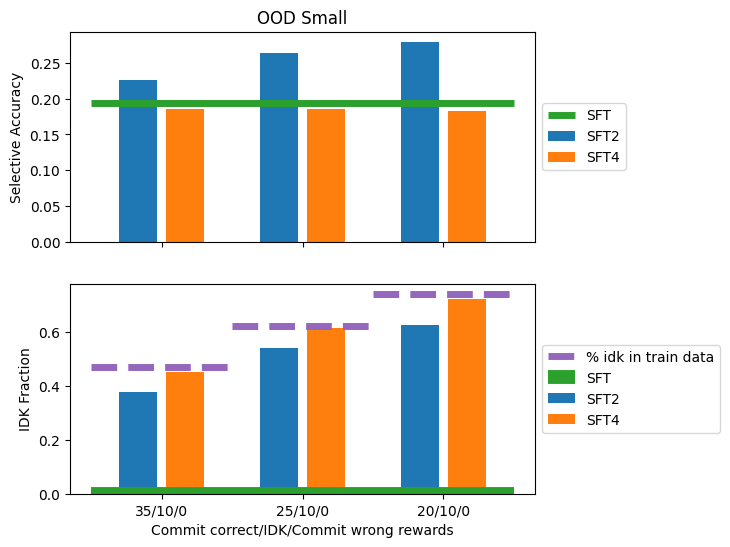

In [117]:
# make 2 subplots vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

sft2_x_idxs = [3*_ for _ in range(3)]
sft4_x_idxs = [3*_+1 for _ in range(3)]

ax1.bar(sft2_x_idxs, np.flip(sft2_selective_accuracies), label="SFT2")
ax1.bar(sft4_x_idxs, np.flip(sft4_selective_accuracies), label="SFT4")
ax1.set_ylabel("Selective Accuracy")
ax1.set_title("OOD Small")
ax1.hlines(sft_accuracy, xmin = -1, xmax = 8, color="C2", label="SFT", linewidth=5)
# add legend on right of figure
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.bar(sft2_x_idxs, np.flip(sft2_idk_fracs), label="SFT2")
ax2.bar(sft4_x_idxs, np.flip(sft4_idk_fracs), label="SFT4")
ax2.set_ylabel("IDK Fraction")

ax2.hlines(1-np.array([0.259475]), xmin = 5, xmax = 8, color="C4", linestyles="dashed", linewidth=5)
ax2.hlines(1-np.array([ 0.379473]), xmin = 2, xmax = 5, color="C4", linestyles="dashed", linewidth=5)
ax2.hlines(1-np.array([0.529793]), xmin = -1, xmax = 2, color="C4", label="% idk in train data", linestyles="dashed", linewidth=5)

ax2.hlines(sft_idk_frac, xmin = -1, xmax = 8, color="C2", label="SFT", linewidth=10)

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax2.set_xticks(np.mean([sft2_x_idxs, sft4_x_idxs], axis=0)
ax2.set_xticklabels(["35/10/0", "25/10/0", "20/10/0"]))
ax2.set_xlabel("Commit correct/IDK/Commit wrong rewards")

In [5]:
generation_categories_ppo_25 = np.load("ckpts/ppo_ctrex_llama7B_commit25_idk10/best_checkpoint/hf_model/generation_categories_oodsmall.npy")
generation_categories_ppo_30 = np.load("ckpts/ppo_ctrex_llama7B_commit30_idk10/best_checkpoint/hf_model/generation_categories_oodsmall.npy")
generation_categories_ppo_35 = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/generation_categories_oodsmall.npy")

In [6]:

ppo_selective_accuracies = [generation_categories_ppo_25[:, 1].mean()/(1-generation_categories_ppo_25[:, 3].mean()),
                                generation_categories_ppo_30[:, 1].mean()/(1-generation_categories_ppo_30[:, 3].mean()),
                                generation_categories_ppo_35[:, 1].mean()/(1-generation_categories_ppo_35[:, 3].mean())]

ppo_selective_accuracies

[0.5117647058823532, 0.43045897079276774, 0.3555276381909548]

In [7]:
ppo_idk_fracs = [generation_categories_ppo_25[:, 3].mean(),
                    generation_categories_ppo_30[:, 3].mean(),
                    generation_categories_ppo_35[:, 3].mean()]
ppo_idk_fracs

[0.932, 0.7124, 0.5224]

Text(0.5, 0, 'Commit correct/IDK/Commit wrong rewards')

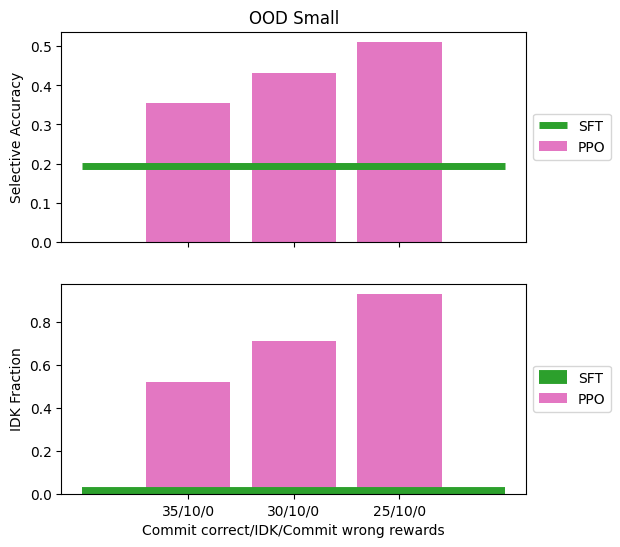

In [17]:
# make 2 subplots vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

sft2_x_idxs = [2*_ for _ in range(2)]
sft4_x_idxs = [3*_+1 for _ in range(3)]

ax1.bar([1,2,3], np.flip(ppo_selective_accuracies), label="PPO", color = "C6")
ax1.set_ylabel("Selective Accuracy")
ax1.set_title("OOD Small")
ax1.hlines(sft_accuracy, xmin = 0, xmax = 4, color="C2", label="SFT", linewidth=5)
# add legend on right of figure
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.bar([1,2,3], np.flip(ppo_idk_fracs), label="PPO", color = "C6")
ax2.set_ylabel("IDK Fraction")

ax2.hlines(sft_idk_frac, xmin = 0, xmax = 4, color="C2", label="SFT", linewidth=10)

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax2.set_xticks([1,2,3])
ax2.set_xticklabels(["35/10/0", "30/10/0", "25/10/0"])
ax2.set_xlabel("Commit correct/IDK/Commit wrong rewards")

In [18]:
files = ["ood_points_0", "ood_points_1_2", "ood_points_3_8", "ood_points_9_32", "ood_points_33+"]
num_mentions = ["0", "1-2", "3-8", "9-32", "33+"]
files = ["custom_trex/"+f+".npy" for f in files]

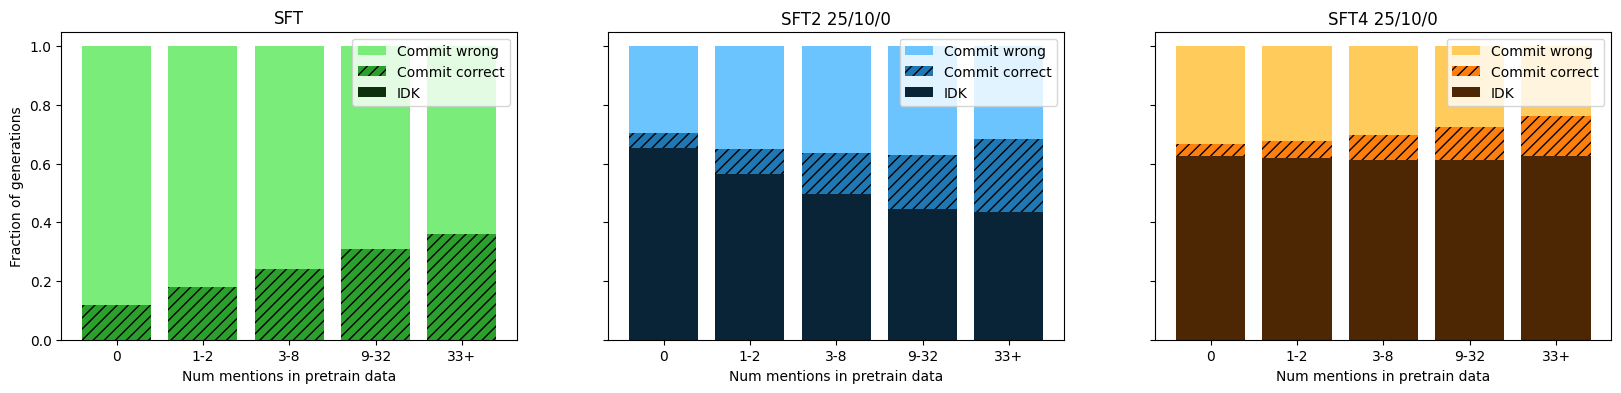

In [150]:
#make 3 subplots horizontal

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

generation_categories_sft = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_15000/hf_model/generation_categories_sample.npy")
sft_idk_fracs = []
sft_commit_correct_fracs = []

for i in range(len(files)):
    idxs = np.load(files[i])
    sft_idk_fracs.append(generation_categories_sft[idxs, 3].mean())
    sft_commit_correct_fracs.append(generation_categories_sft[idxs, 1].mean())
sft_idk_fracs = np.array(sft_idk_fracs)
sft_commit_correct_fracs = np.array(sft_commit_correct_fracs)

C2 = np.array([0.173, 0.627, 0.173])
ax1.bar(num_mentions, [1 for _ in range(len(num_mentions))], color = C2+0.3, label="Commit wrong")
ax1.bar(num_mentions, sft_commit_correct_fracs+sft_idk_fracs, color = C2, label="Commit correct", hatch="///")
ax1.bar(num_mentions, sft_idk_fracs, color = 0.3*C2, label="IDK")
ax1.set_ylabel("Fraction of generations")
ax1.set_xlabel("Num mentions in pretrain data")
ax1.set_title("SFT")
ax1.legend()

generation_categories_sft2_25 = np.load("ckpts/sft2_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_sample.npy")
sft2_idk_fracs = []
sft2_commit_correct_fracs = []

for i in range(len(files)):
    idxs = np.load(files[i])
    sft2_idk_fracs.append(generation_categories_sft2_25[idxs, 3].mean())
    sft2_commit_correct_fracs.append(generation_categories_sft2_25[idxs, 1].mean())
sft2_idk_fracs = np.array(sft2_idk_fracs)
sft2_commit_correct_fracs = np.array(sft2_commit_correct_fracs)

C0 = np.array([0.122, 0.467, 0.706])
ax2.bar(num_mentions, [1 for _ in range(len(num_mentions))], color = np.clip(C0+0.3, 0, 1), label="Commit wrong")
ax2.bar(num_mentions, sft2_commit_correct_fracs+sft2_idk_fracs, color = C0, label="Commit correct", hatch="///")
ax2.bar(num_mentions, sft2_idk_fracs, color = 0.3*C0, label="IDK")
ax2.set_xlabel("Num mentions in pretrain data")
ax2.set_title("SFT2 25/10/0")
ax2.legend()

generation_categories_sft4_25 = np.load("ckpts/sft4_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/generation_categories_sample.npy")
sft4_idk_fracs = []
sft4_commit_correct_fracs = []

for i in range(len(files)):
    idxs = np.load(files[i])
    sft4_idk_fracs.append(generation_categories_sft4_25[idxs, 3].mean())
    sft4_commit_correct_fracs.append(generation_categories_sft4_25[idxs, 1].mean())

sft4_idk_fracs = np.array(sft4_idk_fracs)
sft4_commit_correct_fracs = np.array(sft4_commit_correct_fracs)

C1 = np.array([1.000, 0.498, 0.055])
ax3.bar(num_mentions, [1 for _ in range(len(num_mentions))], color = np.clip(C1+0.3, 0, 1), label="Commit wrong")
ax3.bar(num_mentions, sft4_commit_correct_fracs+sft4_idk_fracs, color = C1, label="Commit correct", hatch="///")
ax3.bar(num_mentions, sft4_idk_fracs, color = 0.3*C1, label="IDK")
ax3.set_xlabel("Num mentions in pretrain data")
ax3.set_title("SFT4 25/10/0")
ax3.legend()


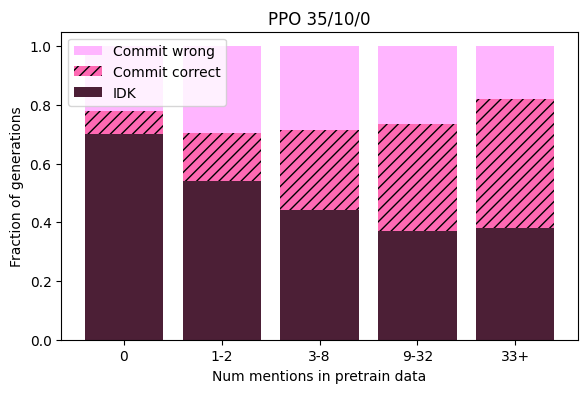

: 

In [27]:
#make 3 subplots horizontal

fig, ax1 = plt.subplots(1, 1, figsize=(20/3, 4), sharey=True)

generation_categories_sft = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/generation_categories.npy")
sft_idk_fracs = []

sft_commit_correct_fracs = []

for i in range(len(files)):
    idxs = np.load(files[i])
    sft_idk_fracs.append(generation_categories_sft[idxs, 3].mean())
    sft_commit_correct_fracs.append(generation_categories_sft[idxs, 1].mean())
sft_idk_fracs = np.array(sft_idk_fracs)
sft_commit_correct_fracs = np.array(sft_commit_correct_fracs)

C6 = np.array([255,105,180])/256
ax1.bar(num_mentions, [1 for _ in range(len(num_mentions))], color = np.clip(C6+0.3, 0, 1), label="Commit wrong")
ax1.bar(num_mentions, sft_commit_correct_fracs+sft_idk_fracs, color = C6, label="Commit correct", hatch="///")
ax1.bar(num_mentions, sft_idk_fracs, color = 0.3*C6, label="IDK")
ax1.set_ylabel("Fraction of generations")
ax1.set_xlabel("Num mentions in pretrain data")
ax1.set_title("PPO 35/10/0")
ax1.legend()

In [24]:
sampled_answer_kl_to_the_sft2_25 = np.load("ckpts/sft2_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/sampled_answer_kl_to_the.npy")
sampled_answer_kl_to_the_sft4_25 = np.load("ckpts/sft4_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/sampled_answer_kl_to_the.npy")

sampled_answer_kl_to_i_sft2_25 = np.load("ckpts/sft2_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/sampled_answer_kl_to_i.npy")
sampled_answer_kl_to_i_sft4_25 = np.load("ckpts/sft4_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/sampled_answer_kl_to_i.npy")

sampled_answer_kl_to_ocs_sft2_25 = np.load("ckpts/sft2_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/sampled_answer_kl_to_ocs.npy")
sampled_answer_kl_to_ocs_sft4_25 = np.load("ckpts/sft4_ctrex_llama7B_commit25_idk10_lr1e-5/checkpoint_15000/hf_model/sampled_answer_kl_to_ocs.npy")

In [5]:
sampled_answer_kl_to_the_sft2_25.shape

(311574,)

Text(0, 0.5, 'Avg KL to OCS')

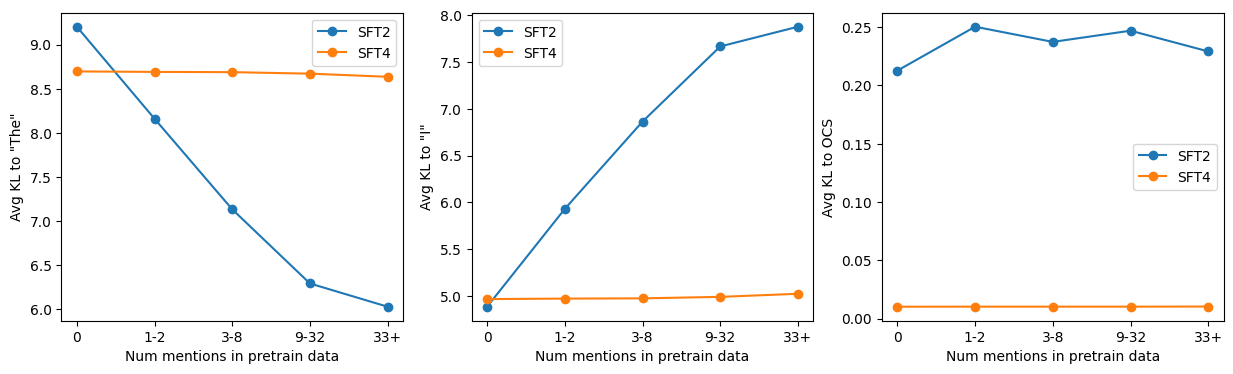

In [28]:
#make 3 subplots horizontal
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

kls_all = []
for i in range(len(files)):
    idxs = np.load(files[i])
    kl = sampled_answer_kl_to_the_sft2_25[idxs]
    kls_all.append(kl.mean())
kls_all = np.array(kls_all)
ax1.plot(num_mentions, kls_all, "o-", label="SFT2")

kls_all = []
for i in range(len(files)):
    idxs = np.load(files[i])
    kl = sampled_answer_kl_to_the_sft4_25[idxs]
    kls_all.append(kl.mean())
kls_all = np.array(kls_all)
ax1.plot(num_mentions, kls_all, "o-", label="SFT4")
ax1.legend()
ax1.set_xlabel("Num mentions in pretrain data")
ax1.set_ylabel("Avg KL to \"The\"")

kls_all = []
for i in range(len(files)):
    idxs = np.load(files[i])
    kl = sampled_answer_kl_to_i_sft2_25[idxs]
    kls_all.append(kl.mean())
kls_all = np.array(kls_all)
ax2.plot(num_mentions, kls_all, "o-", label="SFT2")

kls_all = []
for i in range(len(files)):
    idxs = np.load(files[i])
    kl = sampled_answer_kl_to_i_sft4_25[idxs]
    kls_all.append(kl.mean())
kls_all = np.array(kls_all)
ax2.plot(num_mentions, kls_all, "o-", label="SFT4")
ax2.legend()
ax2.set_xlabel("Num mentions in pretrain data")
ax2.set_ylabel("Avg KL to \"I\"")

kls_all = []
for i in range(len(files)):
    idxs = np.load(files[i])
    kl = sampled_answer_kl_to_ocs_sft2_25[idxs]
    kls_all.append(kl.mean())
kls_all = np.array(kls_all)
ax3.plot(num_mentions, kls_all, "o-", label="SFT2")

kls_all = []
for i in range(len(files)):
    idxs = np.load(files[i])
    kl = sampled_answer_kl_to_ocs_sft4_25[idxs]
    kls_all.append(kl.mean())
kls_all = np.array(kls_all)
ax3.plot(num_mentions, kls_all, "o-", label="SFT4")
ax3.legend()
ax3.set_xlabel("Num mentions in pretrain data")
ax3.set_ylabel("Avg KL to OCS")
